In [3]:
from TSP_Formulation_Methods import *
import numpy as np

distances = np.loadtxt("./data/matriz-rutas-granada")

# Global Parameters

N = 5
p = 3
startNode = 0
endNode = 3

# Process Parameters

p = min(p, N-1)
startNode = min(startNode, N-1)
endNode = min(endNode, N-1)

reduced_distances = distances[:N,:N]/np.max(distances[:N,:N])

maxDistance = np.max(reduced_distances)

lambdas_initial = [maxDistance for i in range(5)]

# Formulation with initial lambdas

Q_matrix_initial,_ = create_QUBO_matrix(reduced_distances, p, startNode, endNode, lambdas_initial)

if is_symmetric(Q_matrix_initial):
    print("QUBO matrix:\n")
    print(Q_matrix_initial)

    np.savetxt("./data/Q_matrix_initial", Q_matrix_initial, fmt='%d')

QUBO matrix:

[[-8.          2.          2.          2.          2.          2.
   1.6081575   1.25202554  1.24785517  1.39501083  2.          1.
   1.          1.          1.          2.          1.          1.
   1.          1.        ]
 [ 2.         -7.          2.          2.          2.          1.39028696
   2.          1.62709115  1.19470927  1.84136391  1.          2.
   1.          1.          1.          1.          2.          1.
   1.          1.        ]
 [ 2.          2.         -7.          2.          2.          1.24765477
   1.67424394  2.          1.4600857   1.25639631  1.          1.
   2.          1.          1.          1.          1.          2.
   1.          1.        ]
 [ 2.          2.          2.         -7.          2.          1.21859582
   1.2104555   1.55449626  2.          1.76541937  1.          1.
   1.          2.          1.          1.          1.          1.
   2.          1.        ]
 [ 2.          2.          2.          2.         -7.         

Naive solution:
[1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0]

Naive solution cost:
1.6953343449091969

Naive solution total cost:
3.314361514309981


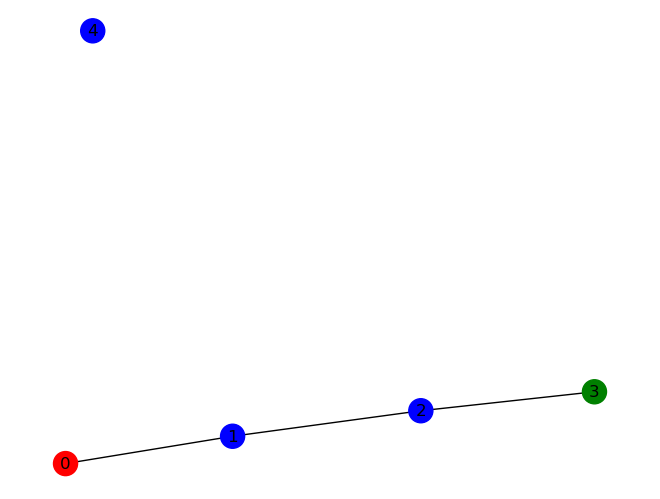

In [4]:
# Naive solution

naive_solution = generate_valid_initial_solution(N, p, startNode, endNode)
naive_solution_cost = calculate_distances_cost(naive_solution, reduced_distances, p)
naive_solution_total_cost = calculate_distances_cost_of_bidireccional_routes(naive_solution, reduced_distances,p)

print("Naive solution:")
print(naive_solution)
print("\nNaive solution cost:")
print(naive_solution_cost)
print("\nNaive solution total cost:")
print(naive_solution_total_cost)

check_solution(naive_solution, N,  p, startNode, endNode)

draw_solution_graph(naive_solution, reduced_distances, p, startNode, endNode)


Brute force solution:
[1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0]

Brute force solution cost:
0.19470926737095248

Brute force solution total cost:
0.7954517258820273
Constraint 2 not fulfilled. At some point there is no stop activated.




Solutions ordered by matrix cost:

Solution:  10000000000100000010
Matrix cost:  -16.610581465258093
Distances cost: 0.19470926737095248


Solution:  10000001000000000010
Matrix cost:  -16.495948924962065
Distances cost: 0.25202553751896706


Solution:  10000000010000000010
Matrix cost:  -16.209978337007453
Distances cost: 0.39501083149627336


Solution:  10000000000010000010
Matrix cost:  -16.07982860469333
Distances cost: 0.4600856976533349


Solution:  10000000000000100010
Matrix cost:  -15.869802551843264
Distances cost: 0.5650987240783685


Solution:  10000001000000100010
Matrix cost:  -15.852958859400498
Distances cost: 1.0735205702997508


Solution:  10000000010010000010
Matrix cost:  -15.801483008388443
Distances cost: 1.0992584958057774


So

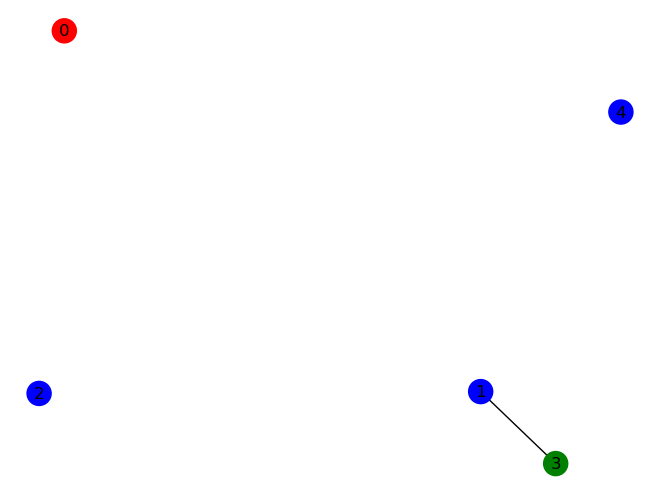

In [5]:
# Brute force solution

solutions_zipped = brute_force_finding(Q_matrix_initial, reduced_distances, p)

solution_brute_force = np.array(list(solutions_zipped[0][0]), dtype=int)
distance_of_solution_brute_force = solutions_zipped[0][-1]
total_distance_of_solution_brute_force = calculate_distances_cost_of_bidireccional_routes(solution_brute_force, reduced_distances, p)

print("\nBrute force solution:")
print(solution_brute_force)
print("\nBrute force solution cost:")
print(distance_of_solution_brute_force)
print("\nBrute force solution total cost:")
print(total_distance_of_solution_brute_force)

check_solution(solution_brute_force, N,  p, startNode, endNode)

draw_solution_graph(solution_brute_force, reduced_distances, p, startNode, endNode)

print("\n\n\n")
print("Solutions ordered by matrix cost:\n")
for i in range(len(solutions_zipped[:10])):
    print("Solution: ",solutions_zipped[i][0])
    print("Matrix cost: ",solutions_zipped[i][1])
    print("Distances cost:" ,solutions_zipped[i][2])
    print("\n")



D-Wave solution:
[1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0]

D-Wave solution cost:
1.166728697262065

D-Wave solution total cost:
2.1635889948180598
Constraint 1 not fulfilled. Some stops are activated at the same time.
Constraint 3 not fulfilled. Some stops are visited more than once.


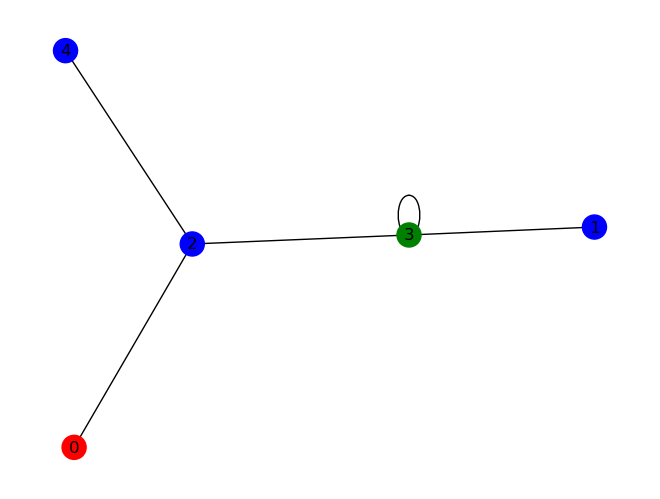

In [6]:
# Solve with D-Wave

solution_Dwave, _ = solve_qubo_with_Dwave(Q_matrix_initial, num_reads=10000)
cost_Dwave = calculate_distances_cost(solution_Dwave, reduced_distances, p)
total_cost_Dwave = calculate_distances_cost_of_bidireccional_routes(solution_Dwave, reduced_distances, p)

print("\nD-Wave solution:")
print(solution_Dwave)
print("\nD-Wave solution cost:")
print(cost_Dwave)
print("\nD-Wave solution total cost:")
print(total_cost_Dwave)

check_solution(solution_Dwave, N,  p, startNode, endNode)

draw_solution_graph(solution_Dwave, reduced_distances, p, startNode, endNode)

QUBO matrix optimized:

[[-80.          11.          11.          11.          11.
   11.          10.6081575   10.25202554  10.24785517  10.39501083
   11.          10.          10.          10.          10.
   11.          10.          10.          10.          10.        ]
 [ 11.         -70.          11.          11.          11.
   10.39028696  11.          10.62709115  10.19470927  10.84136391
   10.          11.          10.          10.          10.
   10.          11.          10.          10.          10.        ]
 [ 11.          11.         -70.          11.          11.
   10.24765477  10.67424394  11.          10.4600857   10.25639631
   10.          10.          11.          10.          10.
   10.          10.          11.          10.          10.        ]
 [ 11.          11.          11.         -70.          11.
   10.21859582  10.2104555   10.55449626  11.          10.76541937
   10.          10.          10.          11.          10.
   10.          10.          10.

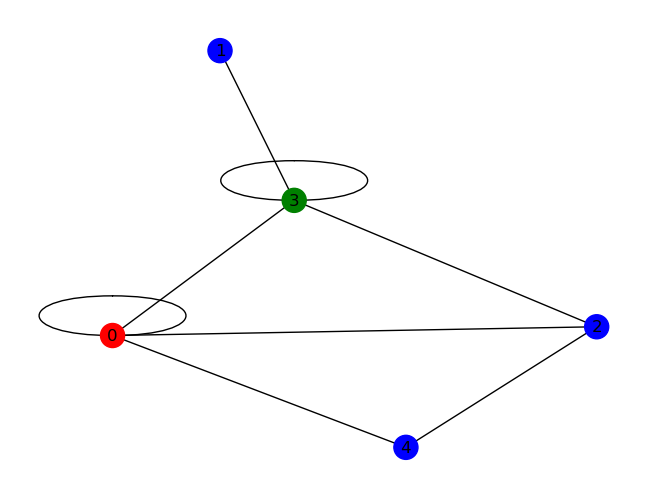

In [8]:
# Optimize lambdas once with naive solution

lambdas_optimized = optimize_lambdas(reduced_distances,p, startNode, endNode, methodIndex=2, initial_lambdas=lambdas_initial, initial_solution=naive_solution)

Q_matrix_optimized,_ = create_QUBO_matrix(reduced_distances, p, startNode, endNode, lambdas_optimized)

if is_symmetric(Q_matrix_optimized):
    print("QUBO matrix optimized:\n")
    print(Q_matrix_optimized)

solution_Dwave_optimized, _ = solve_qubo_with_Dwave(Q_matrix_optimized, num_reads=10000)
cost_Dwave_optimized = calculate_distances_cost(solution_Dwave_optimized, reduced_distances, p)
total_cost_Dwave_optimized = calculate_distances_cost_of_bidireccional_routes(solution_Dwave_optimized, reduced_distances, p)

print("\nD-Wave solution optimized:")
print(solution_Dwave_optimized)
print("\nD-Wave solution cost optimized:")
print(cost_Dwave_optimized)
print("\nD-Wave solution total cost optimized:")
print(total_cost_Dwave_optimized)

check_solution(solution_Dwave_optimized, N,  p, startNode, endNode)

draw_solution_graph(solution_Dwave_optimized, reduced_distances, p, startNode, endNode)

Solution: [1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0] 

SOlution matrix cost: -21.90036832370817 

Distances cost: 1.0735205702997508 

Total distances cost: 2.3307566778321736 

Lambdas: [9.99999993 1.31712818 9.99999995 1.48667928 1.48667928] 

Solution validity: True 



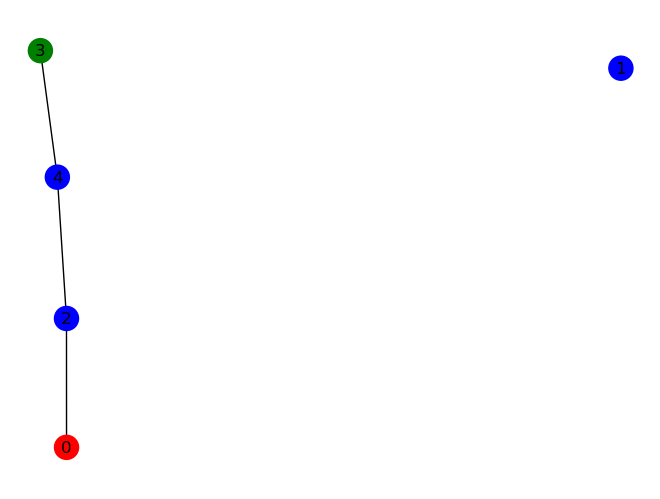

In [11]:
# Iterate over optimization of lambdas and D-Wave solution

solutionDict = contruct_complete_solution(reduced_distances, p, startNode, endNode, method=2,iterations_lambda=100, iterations_solver=100)


print("Solution:", solutionDict["best_solution"], "\n")
print("SOlution matrix cost:", solutionDict["best_solution_matrix_cost"], "\n")
print("Distances cost:", solutionDict["best_solution_cost"], "\n")
print("Total distances cost:", solutionDict["best_solution_total_cost"], "\n")
print("Lambdas:", solutionDict["lambdas"], "\n")
print("Solution validity:", solutionDict["solution_validity"], "\n")

if solutionDict["solution_validity"]:
    np.savetxt("./data/Q_best_solution", solutionDict["Q_matrix"], fmt='%d')

draw_solution_graph(solutionDict["best_solution"], reduced_distances, p, startNode, endNode)